# Import and Initial Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
#import plotly.graph_objects as go
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
graf = pd.read_csv('Graffiti_718.csv') #read up to july 18, 2022
graf.Point = graf.Point.apply(ast.literal_eval) #change point to a tuple

graf = graf[graf.Point != (0, 0)] #add longitude and latitude 
graf['latitude'] = graf.Point.str[0] # separate long and lat
graf['longitude'] = graf.Point.str[1]
graf['DateTime'] = pd.to_datetime(graf['Opened']) #add a date time object

In [3]:
## remove the duplicates
graf_collin = graf[~graf['Status Notes'].str.contains("duplicate", na = False)]

## Graf collin is just the graf dataset after collin cleaned it for his purposes. 
graf_collin.Opened = pd.to_datetime(graf_collin.Opened)
graf_collin.Closed = pd.to_datetime(graf_collin.Closed)

## if closed column is blank, then it hasnt been closed
graf_collin['Closed_ind'] = ~graf_collin['Closed'].isna()

## only grabbing cases that have been closed
graf_only_closed_cases = graf_collin[graf_collin.Closed_ind == True]

## Calculate time between opening and closing of a case
time_to_close = graf_only_closed_cases.Closed - graf_only_closed_cases.Opened 
graf_only_closed_cases['time_to_close'] = time_to_close

## Check out how time to close is distributed between positive, negative and zero values.
number_of_negative_times = graf_only_closed_cases[graf_only_closed_cases.time_to_close < '0 days 00:00:00'].time_to_close.count()
number_of_zero_times = graf_only_closed_cases[graf_only_closed_cases.time_to_close == '0 days 00:00:00'].time_to_close.count()
number_of_positive_times = graf_only_closed_cases[graf_only_closed_cases.time_to_close > '0 days 00:00:00'].time_to_close.count()

values = [number_of_negative_times,  number_of_positive_times, number_of_zero_times]
labels = ['Less than 0 seconds', 'More than 0 seconds', '0 seconds']
time_df = pd.DataFrame({'Time to Close a Case':labels, 'Number of Occurances':values})

## remove closed cases where the case was closed on or before it was opened.
graf_closed_cases_clean = graf_only_closed_cases[graf_only_closed_cases.time_to_close > '0 days 00:00:00']

## Reassign to df called clean so everyone knows what to use
graf_clean = graf_closed_cases_clean

## Show the closure times, all but more than 0 seconds we removed. 
time_df

,Time to Close a Case,Number of Occurances
0,Less than 0 seconds,3684
1,More than 0 seconds,650346
2,0 seconds,5


In [4]:
graf_clean.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Neighborhood,Supervisor District,Point,Source,latitude,longitude,DateTime,Closed_ind,time_to_close
0,768460,2010-11-08 16:37:37,2010-11-09 16:09:45,11/09/2010 04:09:45 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Pole,Pole - Offensive,Intersection of BALBOA ST and PARK PRESIDIO BLVD,Inner Richmond,1.0,"(37.77686691, -122.47203827)",Web,37.776867,-122.472038,2010-11-08 16:37:37,True,0 days 23:32:08
9,698996,2010-07-23 11:10:43,2010-08-23 14:19:09,08/23/2010 02:19:09 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Offensive,"399 10TH AVE, SAN FRANCISCO, CA, 94118",Inner Richmond,1.0,"(37.78114319, -122.46872711)",Phone,37.781143,-122.468727,2010-07-23 11:10:43,True,31 days 03:08:26
12,678004,2010-06-18 21:49:21,2010-08-25 11:19:08,08/25/2010 11:19:08 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_residential,Building_residential - Not_Offensive,Intersection of DE LONG ST and FLOURNOY ST,Outer Mission,11.0,"(37.70965195, -122.46322632)",Web,37.709652,-122.463226,2010-06-18 21:49:21,True,67 days 13:29:47
13,677327,2010-06-17 22:39:28,2010-08-25 11:19:07,08/25/2010 11:19:07 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_residential,Building_residential - Not_Offensive,Intersection of ALEMANY BLVD and FARRAGUT AVE,Outer Mission,11.0,"(37.71205521, -122.4519577)",Phone,37.712055,-122.451958,2010-06-17 22:39:28,True,68 days 12:39:39
15,672420,2010-06-09 21:24:21,2010-06-10 15:16:54,06/10/2010 03:16:54 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Sidewalk_structure,Sidewalk_structure - Offensive,Intersection of PACIFIC AVE and SPRUCE ST,Presidio Heights,2.0,"(37.79056168, -122.45424652)",Web,37.790562,-122.454247,2010-06-09 21:24:21,True,0 days 17:52:33


# Initial Exploration

In [5]:
sf_zips = [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111, 94112, 94114, 94115, 94116, 94117, 94118, 94121, 94122, 94123,
           94124, 94127, 94129, 94130, 94131, 94132, 94133, 94134, 94158]
zips_str = [str(zips) for zips in sf_zips] # get a list of all the zip codes in SF

graf_clean['zip_code'] = graf_clean['Address'].str[-5:] #add zip code column
graf_clean = graf_clean[graf_clean['zip_code'].isin(zips_str)] #filter rows that have SF zip codes

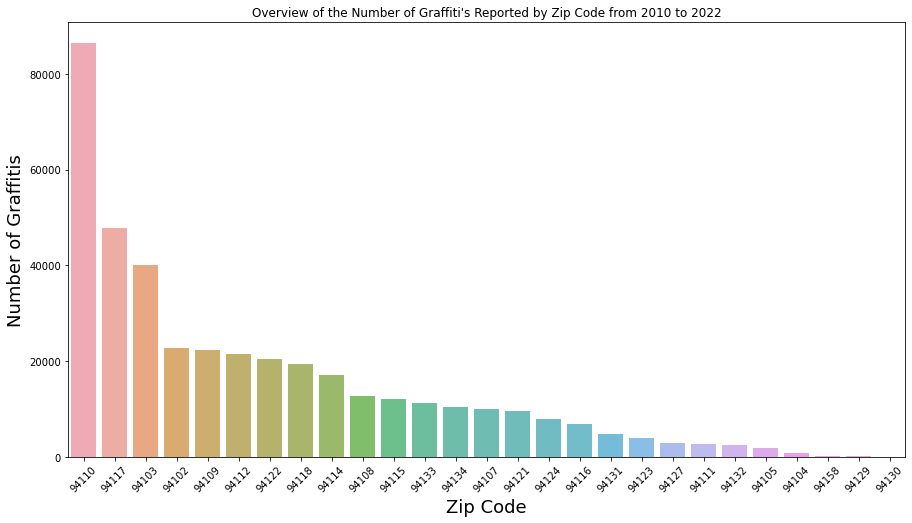

In [6]:
#bar plot of number of reports by zip code

plt.figure(figsize=(15,8))
zip_value_count = graf_clean.zip_code.value_counts()
sns.barplot(x = zip_value_count.index, y = zip_value_count, alpha=0.8)
plt.xticks(rotation=45)
plt.title("Overview of the Number of Graffiti's Reported by Zip Code from 2010 to 2022")
plt.xlabel('Zip Code', fontsize=18)
plt.ylabel('Number of Graffitis', fontsize=18)
pass

In [7]:
#graffiti in 2022 only
graf2022 = graf_clean[(graf_clean['DateTime'] > '2022-01-01')]
graf2022

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Neighborhood,Supervisor District,Point,Source,latitude,longitude,DateTime,Closed_ind,time_to_close,zip_code
316,15410292,2022-06-04 08:21:39,2022-07-04 23:00:22,07/04/2022 11:00:22 PM,Closed,Transferred - Your request falls under the res...,US Postal Service Maintenance Queue,Graffiti,Graffiti on Mail_box,Mail_box - Not_Offensive,...,Mission Dolores,9.0,"(37.76177505, -122.42203569)",Mobile/Open311,37.761775,-122.422036,2022-06-04 08:21:39,True,30 days 14:38:43,94110
371,15435638,2022-06-09 17:19:00,2022-07-11 13:30:50,07/11/2022 01:30:50 PM,Closed,Administrative Closure - Per process - cases a...,AT and T - Graffiti Queue,Graffiti,Graffiti on ATT_Property,ATT_Property - Not_Offensive,...,Outer Sunset,4.0,"(37.7612619, -122.4812888)",Web,37.761262,-122.481289,2022-06-09 17:19:00,True,31 days 20:11:50,94122
482,15493034,2022-06-24 10:11:00,2022-07-04 22:00:17,07/04/2022 10:00:17 PM,Closed,Case Resolved - Closed: No response from BSM i...,DPW BSM Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,...,Dolores Heights,9.0,"(37.75702703, -122.42117583)",Mobile/Open311,37.757027,-122.421176,2022-06-24 10:11:00,True,10 days 11:49:17,94110
673,15509393,2022-06-28 12:27:00,2022-07-06 09:50:00,07/06/2022 09:50:00 AM,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Not_Offensive,...,Panhandle,5.0,"(37.77453806, -122.44143202)",Mobile/Open311,37.774538,-122.441432,2022-06-28 12:27:00,True,7 days 21:23:00,94117
2242,15529879,2022-07-04 10:34:00,2022-07-04 11:58:41,07/04/2022 11:58:41 AM,Closed,Removed - Case Resolved,Fishermans Wharf CBD Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Offensive,...,Fisherman's Wharf,3.0,"(37.80549922, -122.41789599)",Mobile/Open311,37.805499,-122.417896,2022-07-04 10:34:00,True,0 days 01:24:41,94133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666611,15525158,2022-07-02 11:18:00,2022-07-02 14:30:11,07/02/2022 02:30:11 PM,Closed,Removed - Case Resolved - TLCBD clean team res...,Tenderloin CBD Queue,Graffiti,Graffiti on Building_residential,Building_residential - Not_Offensive,...,Civic Center,5.0,"(37.7816137, -122.41498545)",Mobile/Open311,37.781614,-122.414985,2022-07-02 11:18:00,True,0 days 03:12:11,94102
666616,15526313,2022-07-02 17:21:00,2022-07-03 10:52:07,07/03/2022 10:52:07 AM,Closed,Removed - Case Resolved - TLCBD clean team res...,Tenderloin CBD Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,...,Tenderloin,5.0,"(37.7813338, -122.41166454)",Mobile/Open311,37.781334,-122.411665,2022-07-02 17:21:00,True,0 days 17:31:07,94103
666618,15527113,2022-07-03 07:50:40,2022-07-15 21:30:13,07/15/2022 09:30:13 PM,Closed,Case Resolved - Per process - cases are closed...,Clear Channel - Transit Queue,Graffiti,Graffiti on Transit_Shelter_Platform,Transit_Shelter_Platform - Not_Offensive,...,Pacific Heights,3.0,"(37.7938626, -122.4234312)",Mobile/Open311,37.793863,-122.423431,2022-07-03 07:50:40,True,12 days 13:39:33,94109
666619,15527537,2022-07-03 10:53:00,2022-07-10 09:13:33,07/10/2022 09:13:33 AM,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on Signal_box,Signal_box - Offensive,...,Cole Valley,8.0,"(37.76635741, -122.45279107)",Mobile/Open311,37.766357,-122.452791,2022-07-03 10:53:00,True,6 days 22:20:33,94117


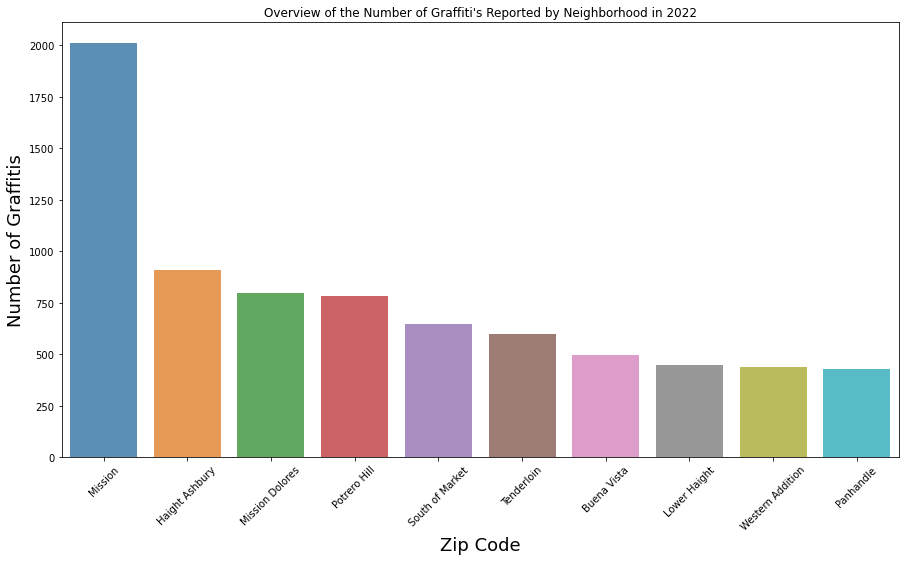

In [8]:
#bar graph of number of graffiti by neighborhood
plt.figure(figsize=(15,8))
zip_value_count = graf2022.Neighborhood.value_counts().head(10)
sns.barplot(x = zip_value_count.index, y = zip_value_count, alpha=0.8)
plt.xticks(rotation=45)
plt.title("Overview of the Number of Graffiti's Reported by Neighborhood in 2022")
plt.xlabel('Zip Code', fontsize=18)
plt.ylabel('Number of Graffitis', fontsize=18)
pass

In [9]:
#setting the coordinates for the map
graf2022 = graf2022.head(2000)
graf2022= graf2022[graf2022.latitude > 37]
graf2022 = graf2022[graf2022.longitude > -123]
print(graf2022.latitude.min(),
graf2022.longitude.min(),
graf2022.latitude.max(),
graf2022.longitude.max())

37.7084086 -122.5143063 37.8086093 -122.3760726


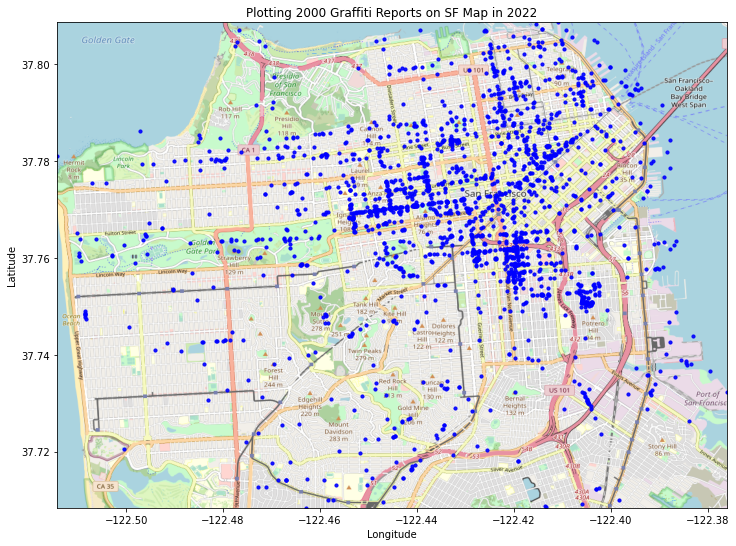

In [10]:
BBox = ((graf2022.longitude.min(),  graf2022.longitude.max(),      
         graf2022.latitude.min(), graf2022.latitude.max())) #borders for the map
sf_map = plt.imread('map_sf.png') #Sf map

#Use plt to add dots to the map of SF, this uses the long and lat to identify where to put the points

fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(graf2022.longitude, graf2022.latitude, zorder=1, alpha= .9, c='b', s=10)
ax.set_title('Plotting 2000 Graffiti Reports on SF Map in 2022')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.imshow(sf_map, zorder=0, extent = BBox, aspect= 'equal')
pass

In [11]:
#police report data set
police = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
police.shape

(612761, 34)

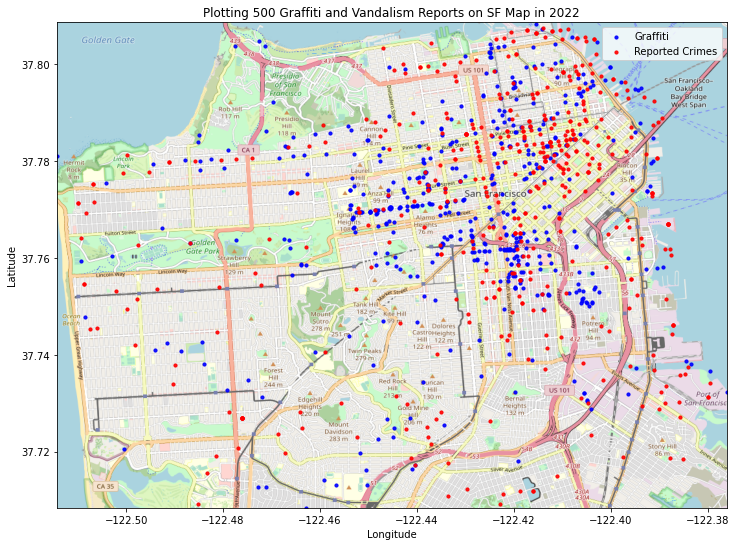

In [12]:
#only 2022 police reports, graph the same as the map above with criminal activity
#only use 500 for visibility purposes
police2022 = police[(police['Incident Date'] > '2021/12/31')]
police2022 = police2022.sample(500)

graf2022 = graf2022.sample(500)

fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(graf2022.longitude, graf2022.latitude, zorder=1, alpha= .9, c='b', s=10, label = "Graffiti")
ax.scatter(police2022.Longitude, police2022.Latitude, zorder = 1, alpha = .9, c = 'r',s = 10, label = "Reported Crimes")
ax.set_title('Plotting 500 Graffiti and Vandalism Reports on SF Map in 2022')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
ax.imshow(sf_map, zorder=0, extent = BBox, aspect= 'equal')

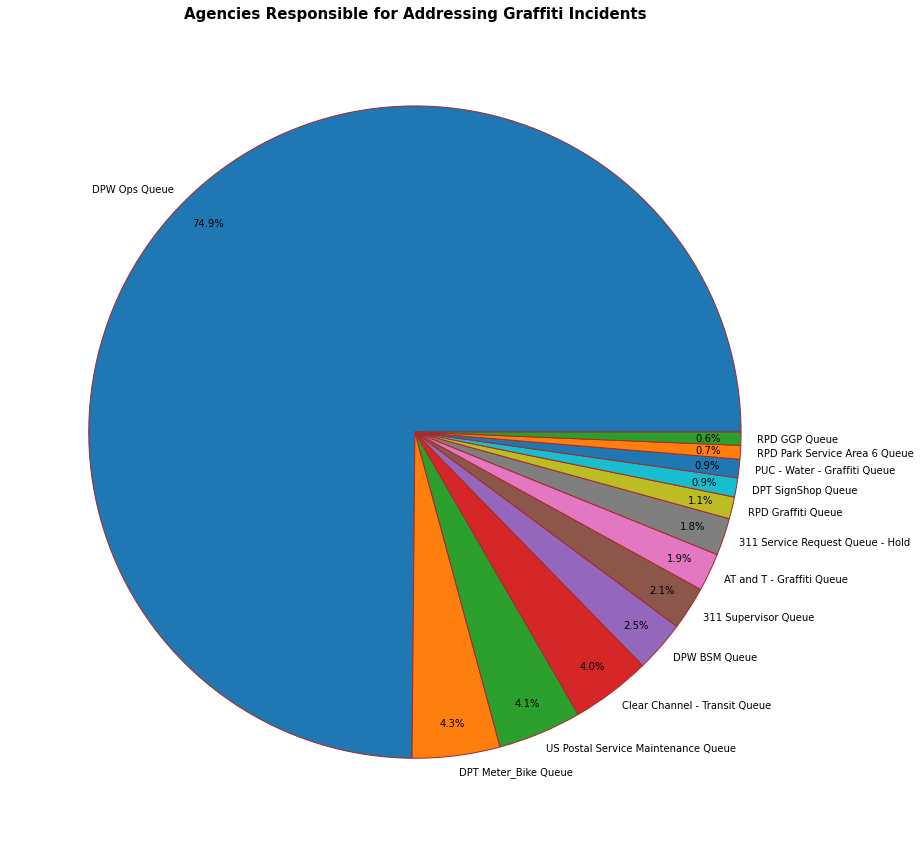

In [13]:
x = graf_clean['Responsible Agency'].value_counts()[0:13]
plt.figure(figsize=(15, 15))
plt.pie(x, labels = graf_clean['Responsible Agency'].value_counts()[0:13].index, textprops={"fontsize":10}, autopct='%.1f%%', pctdistance = 0.90, labeldistance = 1.05, wedgeprops={'edgecolor': 'brown'})
plt.title('Agencies Responsible for Addressing Graffiti Incidents', loc = 'Center', fontsize = 15, fontweight='bold')
plt.show()

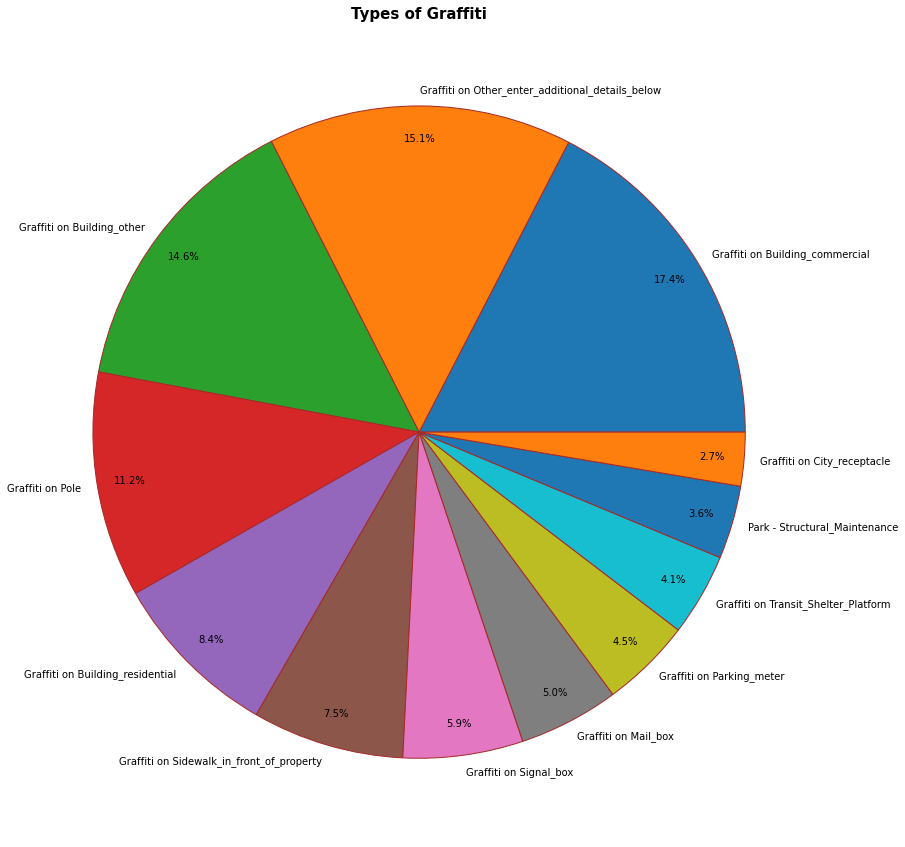

In [14]:
y = graf_clean['Request Type'].value_counts()[:12]
plt.figure(figsize=(15, 15))
plt.pie(y, labels = graf_clean['Request Type'].value_counts()[:12].index, textprops={"fontsize":10}, autopct='%.1f%%', pctdistance = 0.90, labeldistance = 1.05, wedgeprops={'edgecolor': 'brown'})
plt.title('Types of Graffiti', loc = 'Center', fontsize = 15, fontweight='bold')
plt.show()

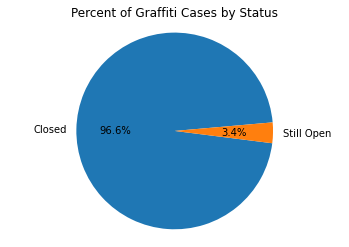

In [15]:
## Lets first check out how many cases have been closed
graf_collin.Closed_ind.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(graf_collin.Closed_ind.value_counts(), labels=['Closed', 'Still Open'], autopct='%1.1f%%',
         startangle=5, textprops={'color':"black"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Percent of Graffiti Cases by Status')
plt.show()

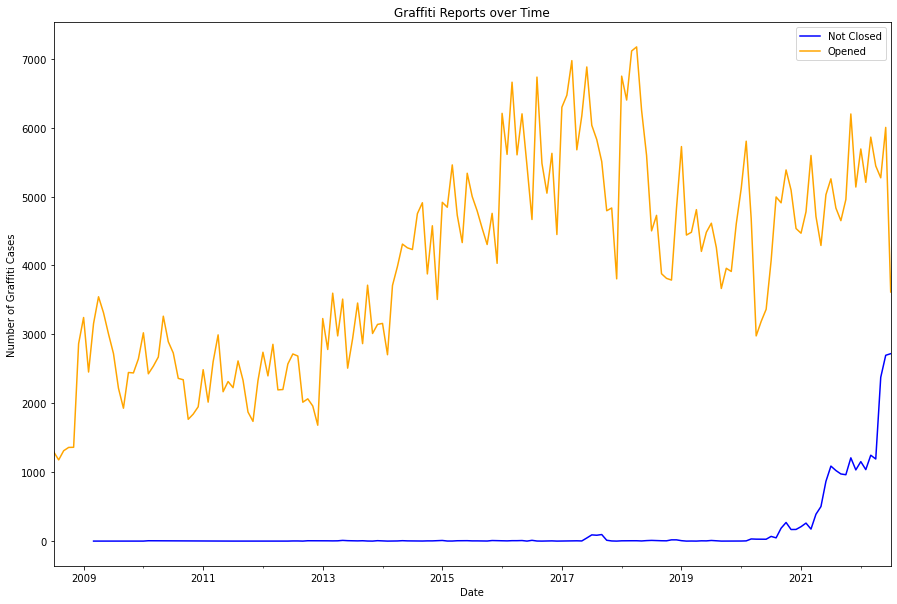

In [16]:
## grab opened and not closed cases over time to see what the relationship is
Opened_Cases = graf_collin['Opened'].dt.to_period('M').value_counts()
Not_Closed = graf_collin[graf_collin.Closed_ind == False]

plt.figure(figsize = (15, 10))
Not_Closed['Opened'].dt.to_period('M').value_counts().sort_index().plot(label = 'Not Closed', color = 'blue')
Opened_Cases.sort_index().plot(label = 'Opened', color = 'orange')

plt.ylabel('Number of Graffiti Cases')
plt.xlabel('Date')
plt.title('Graffiti Reports over Time')
plt.legend()

pass

# Questions

## Are there any monthly/seasonal trends with graffiti cases being opened?

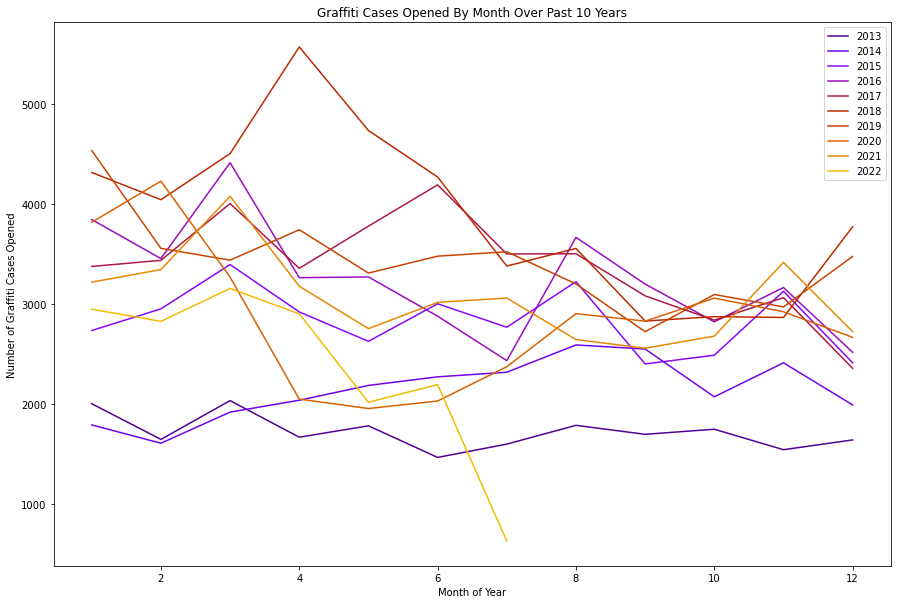

In [17]:
## separate the datetime Opened to year and month
graf_clean['Year_Opened'] = graf_clean.Opened.dt.year
graf_clean['Month_Opened'] = graf_clean.Opened.dt.month
## see what years there are
years_in_set = graf_clean.Year_Opened.sort_values().unique()
## lets only grab the past 10 years so plot isnt too messy
past_10_years = years_in_set[years_in_set > 2012]
## want colors of lines to scale so they make sense. Lets use dark to light scale 
colormap = plt.cm.gnuplot
colors = [colormap(i) for i in np.linspace(.1,.9, len(past_10_years))]

j = 0
plt.figure(figsize = (15, 10))

## for each year we are going to add a line. use an interator for colros
for i in past_10_years:
        filtered = graf_clean[graf_clean.Year_Opened == i]
        filtered['Month_Opened'].value_counts().sort_index().plot(label = i, color = colors[j])
        j += 1
plt.ylabel('Number of Graffiti Cases Opened')
plt.xlabel('Month of Year')
plt.title('Graffiti Cases Opened By Month Over Past 10 Years')
plt.legend()

## pass is just to skip that plot output info line
pass


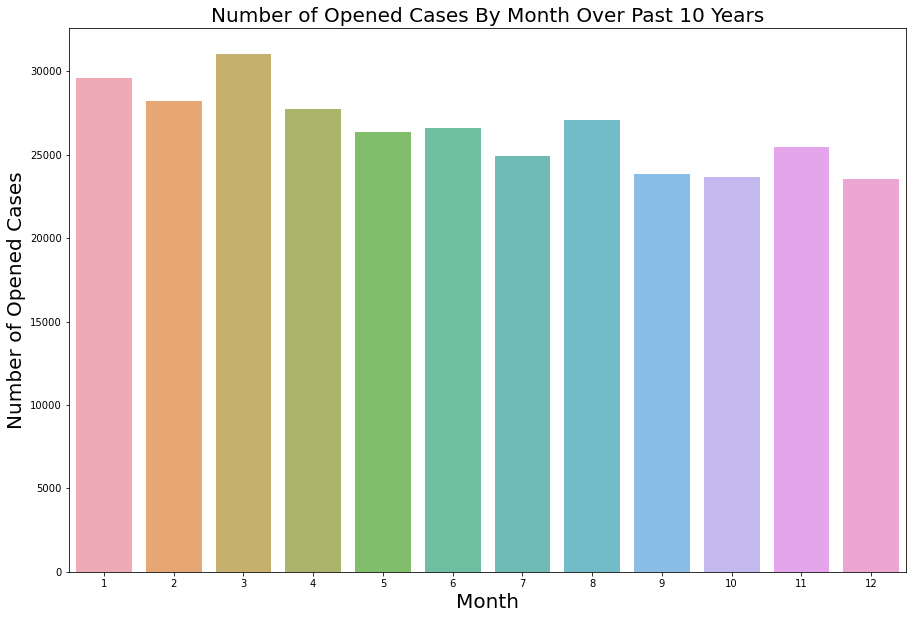

In [18]:
## from above plot, we will remove 2022 as not complete
past_10_years = past_10_years[:-1]
past_10_df = graf_clean[graf_clean.Year_Opened.isin(past_10_years)]

## Get opened cases by month
monthly_plot = past_10_df.Month_Opened.value_counts().sort_index().rename_axis('Month').reset_index(name='Number_of_Opened_Cases')


plt.figure(figsize=(15, 10))
sns.barplot(x = monthly_plot.Month, y = monthly_plot.Number_of_Opened_Cases, alpha = .8)
plt.ylabel("Number of Opened Cases", fontsize = 20)
plt.xlabel("Month", fontsize = 20)
plt.title("Number of Opened Cases By Month Over Past 10 Years", fontsize = 20)
pass

## How long does it take to close graffiti cases? 

In [19]:
## middle times for time to close, which was our question
## We already did the filtering above, so make sure we use graf_clean
print('average time to close: ', graf_clean[graf_clean.time_to_close > '0 days 00:00:00'].time_to_close.mean())
print('median time to close: ', graf_clean[graf_clean.time_to_close > '0 days 00:00:00'].time_to_close.median())

average time to close:  65 days 22:30:07.926158244
median time to close:  6 days 23:53:15


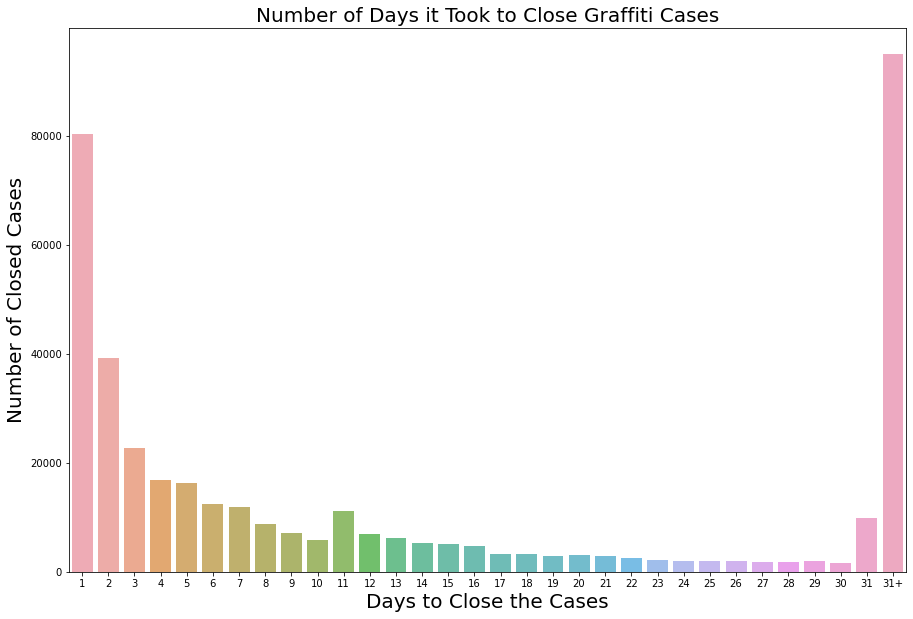

In [20]:
## Get number of days and number of hours to close case. 
## Use ceiling for rounding since if took 20 minutes to solve, well you would need more than 0 hours to solve. 
graf_clean['hours_to_close'] = np.ceil(graf_clean.time_to_close / np.timedelta64(1, 'h'))
graf_clean['days_to_close'] = np.ceil(graf_clean.time_to_close / np.timedelta64(1, 'D'))

## Going to look at how long it takes to close cases, start daily, then zoom in. 
days_to_close = graf_clean.days_to_close.value_counts().sort_index().rename_axis('Days_to_Close').reset_index(name='Number_of_Closed_Cases')

def days_bucketed(Days_to_Close):
    '''Returns bucket for the day column. If above 31 days to solve then saying 31+ for viz purposes'''
    if Days_to_Close > 31:
        return '31+'
    else:
        return int(Days_to_Close)
    
## Plot the number of cases by bucket
days_to_close['days_bucketed'] = days_to_close.Days_to_Close.apply(days_bucketed)
days_to_close_plot = days_to_close[['days_bucketed', 'Number_of_Closed_Cases']].groupby('days_bucketed').sum()
days_to_close_plot
plt.figure(figsize=(15, 10))
sns.barplot(x = days_to_close_plot.index, y = days_to_close_plot.Number_of_Closed_Cases, alpha = .8)
plt.ylabel("Number of Closed Cases", fontsize = 20)
plt.xlabel("Days to Close the Cases", fontsize = 20)
plt.title("Number of Days it Took to Close Graffiti Cases", fontsize = 20)
pass

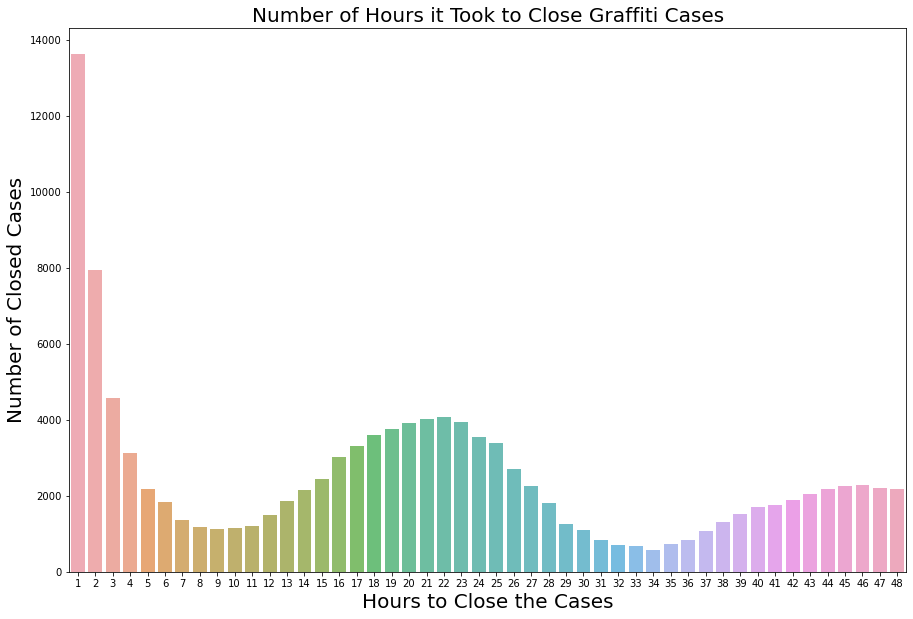

In [21]:
## then just show hours 1-48
hours_to_close = graf_clean.hours_to_close.value_counts().sort_index().rename_axis('Hours_to_Close').reset_index(name='Number_of_Closed_Cases')

## Only want to look at the first two days based on plot above. 
hours_to_close_plot = hours_to_close[hours_to_close.Hours_to_Close < 49]
hours_to_close_plot.Hours_to_Close = hours_to_close_plot.Hours_to_Close.astype(int)

plt.figure(figsize=(15, 10))
sns.barplot(x = hours_to_close_plot.Hours_to_Close, y = hours_to_close_plot.Number_of_Closed_Cases, alpha = .8)
plt.ylabel("Number of Closed Cases", fontsize = 20)
plt.xlabel("Hours to Close the Cases", fontsize = 20)
plt.title("Number of Hours it Took to Close Graffiti Cases", fontsize = 20)

pass


## Are the top 3 agencies in SF specialized in the type of graffiti they seek to mitigate?

In [22]:
# 3 dataframes filtered to only have the rows asscoiated with one agency per dataframe
dpw_ops = graf_clean[(graf_clean['Responsible Agency'] == 'DPW Ops Queue') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')]
usps = graf_clean[(graf_clean['Responsible Agency'] == 'US Postal Service Maintenance Queue') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')] 
clear_channel = graf_clean[(graf_clean['Responsible Agency'] == 'Clear Channel - Transit Queue') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')]

def get_types(df):
    '''Returns the top 5 types of graffiti that an agency combats'''
    return df['Request Type'].value_counts()[:5]

#calling the function on the filtered dataframes
dpw_func = pd.DataFrame(get_types(dpw_ops))
dpw_func

,Request Type
Graffiti on Building_commercial,58047
Graffiti on Building_other,48989
Graffiti on Pole,37762
Graffiti on Building_residential,28662
Graffiti on Sidewalk_in_front_of_property,24234


In [23]:
usps_func = pd.DataFrame(get_types(usps))
usps_func

,Request Type
Graffiti on Mail_box,15080
Graffiti on Building_commercial,139
Graffiti on Building_other,64
Graffiti on City_receptacle,22
Graffiti on Building_residential,10


In [24]:
clear_channel_func = pd.DataFrame(get_types(clear_channel))
clear_channel_func

,Request Type
Graffiti on Transit_Shelter_Platform,14005
Graffiti on Building_commercial,131
Graffiti on Sidewalk_in_front_of_property,56
Graffiti on Building_other,52
Graffiti on Street,41


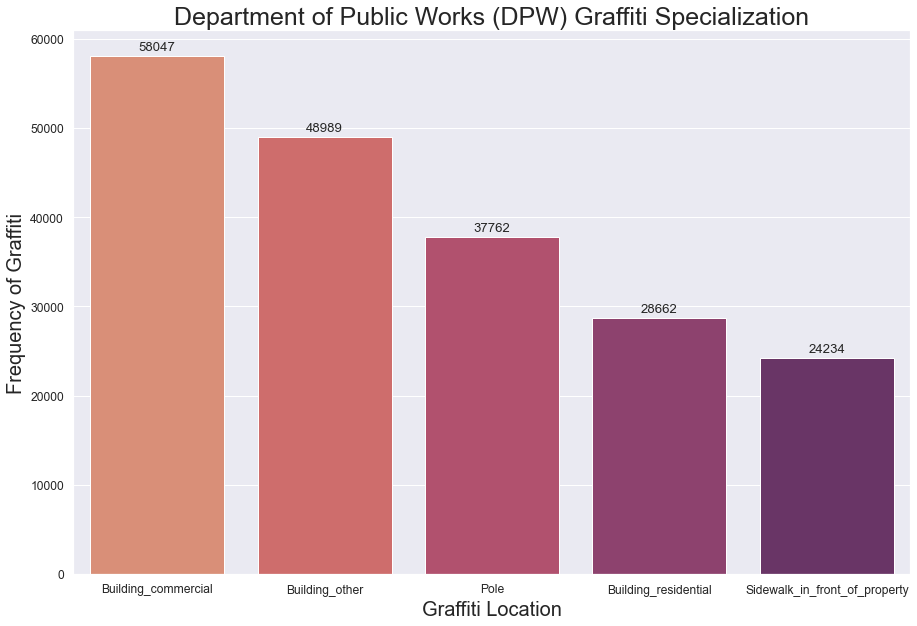

In [25]:
#creating plot for DPW
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.1)
ax = sns.barplot(x = get_types(dpw_ops).index.str[12:], y = get_types(dpw_ops), alpha = 1, palette="flare")
plt.ylabel("Frequency of Graffiti", fontsize = 20)
plt.xlabel("Graffiti Location", fontsize = 20)
plt.title("Department of Public Works (DPW) Graffiti Specialization", fontsize = 25)

for i in ax.containers:
    ax.bar_label(i, padding = 3)
    
pass

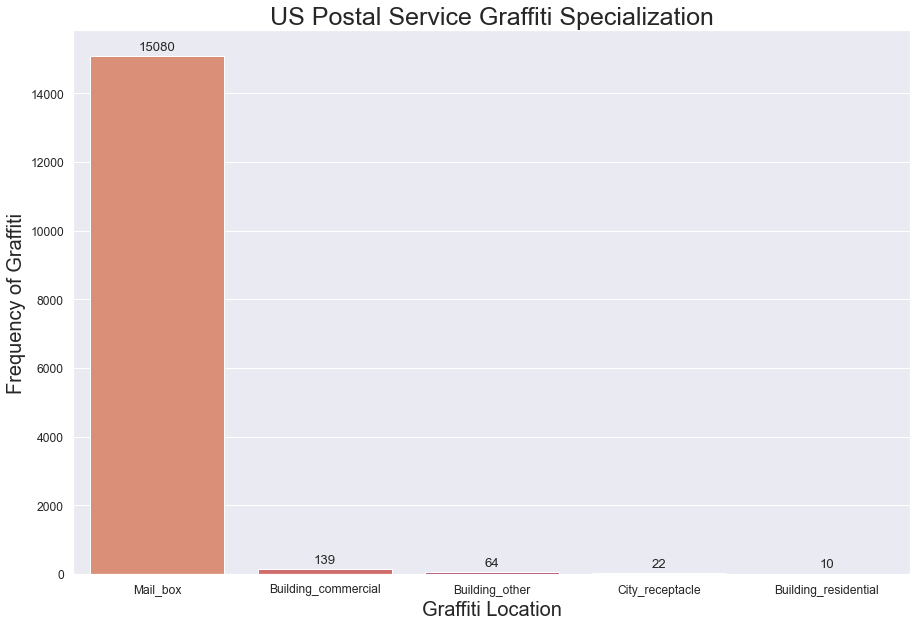

In [26]:
#creating plot for USPS
plt.figure(figsize=(15,10))
ax = sns.barplot(x = get_types(usps).index.str[12:], y = get_types(usps), alpha = 1, palette="flare")
plt.ylabel("Frequency of Graffiti", fontsize = 20)
plt.xlabel("Graffiti Location", fontsize = 20)
plt.title("US Postal Service Graffiti Specialization", fontsize = 25)

for i in ax.containers:
    ax.bar_label(i,padding = 3)
pass

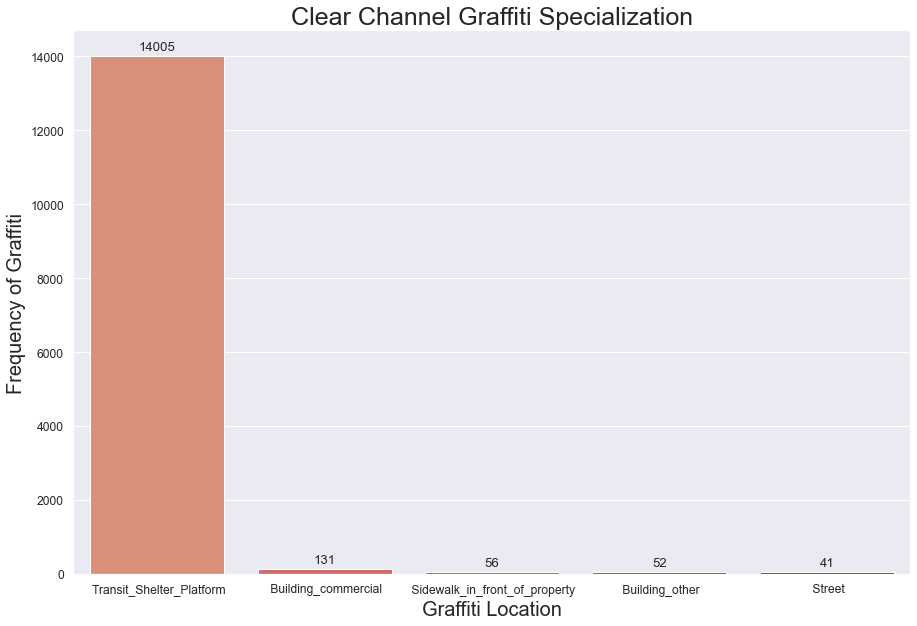

In [27]:
#creating plot for Clear Channel
plt.figure(figsize=(15,10))
ax = sns.barplot(x = get_types(clear_channel).index.str[11:], y = get_types(clear_channel), alpha = 1, palette="flare")
plt.ylabel("Frequency of Graffiti", fontsize = 20)
plt.xlabel("Graffiti Location", fontsize = 20)
plt.title("Clear Channel Graffiti Specialization", fontsize = 25)

for i in ax.containers:
    ax.bar_label(i, padding = 3)
pass

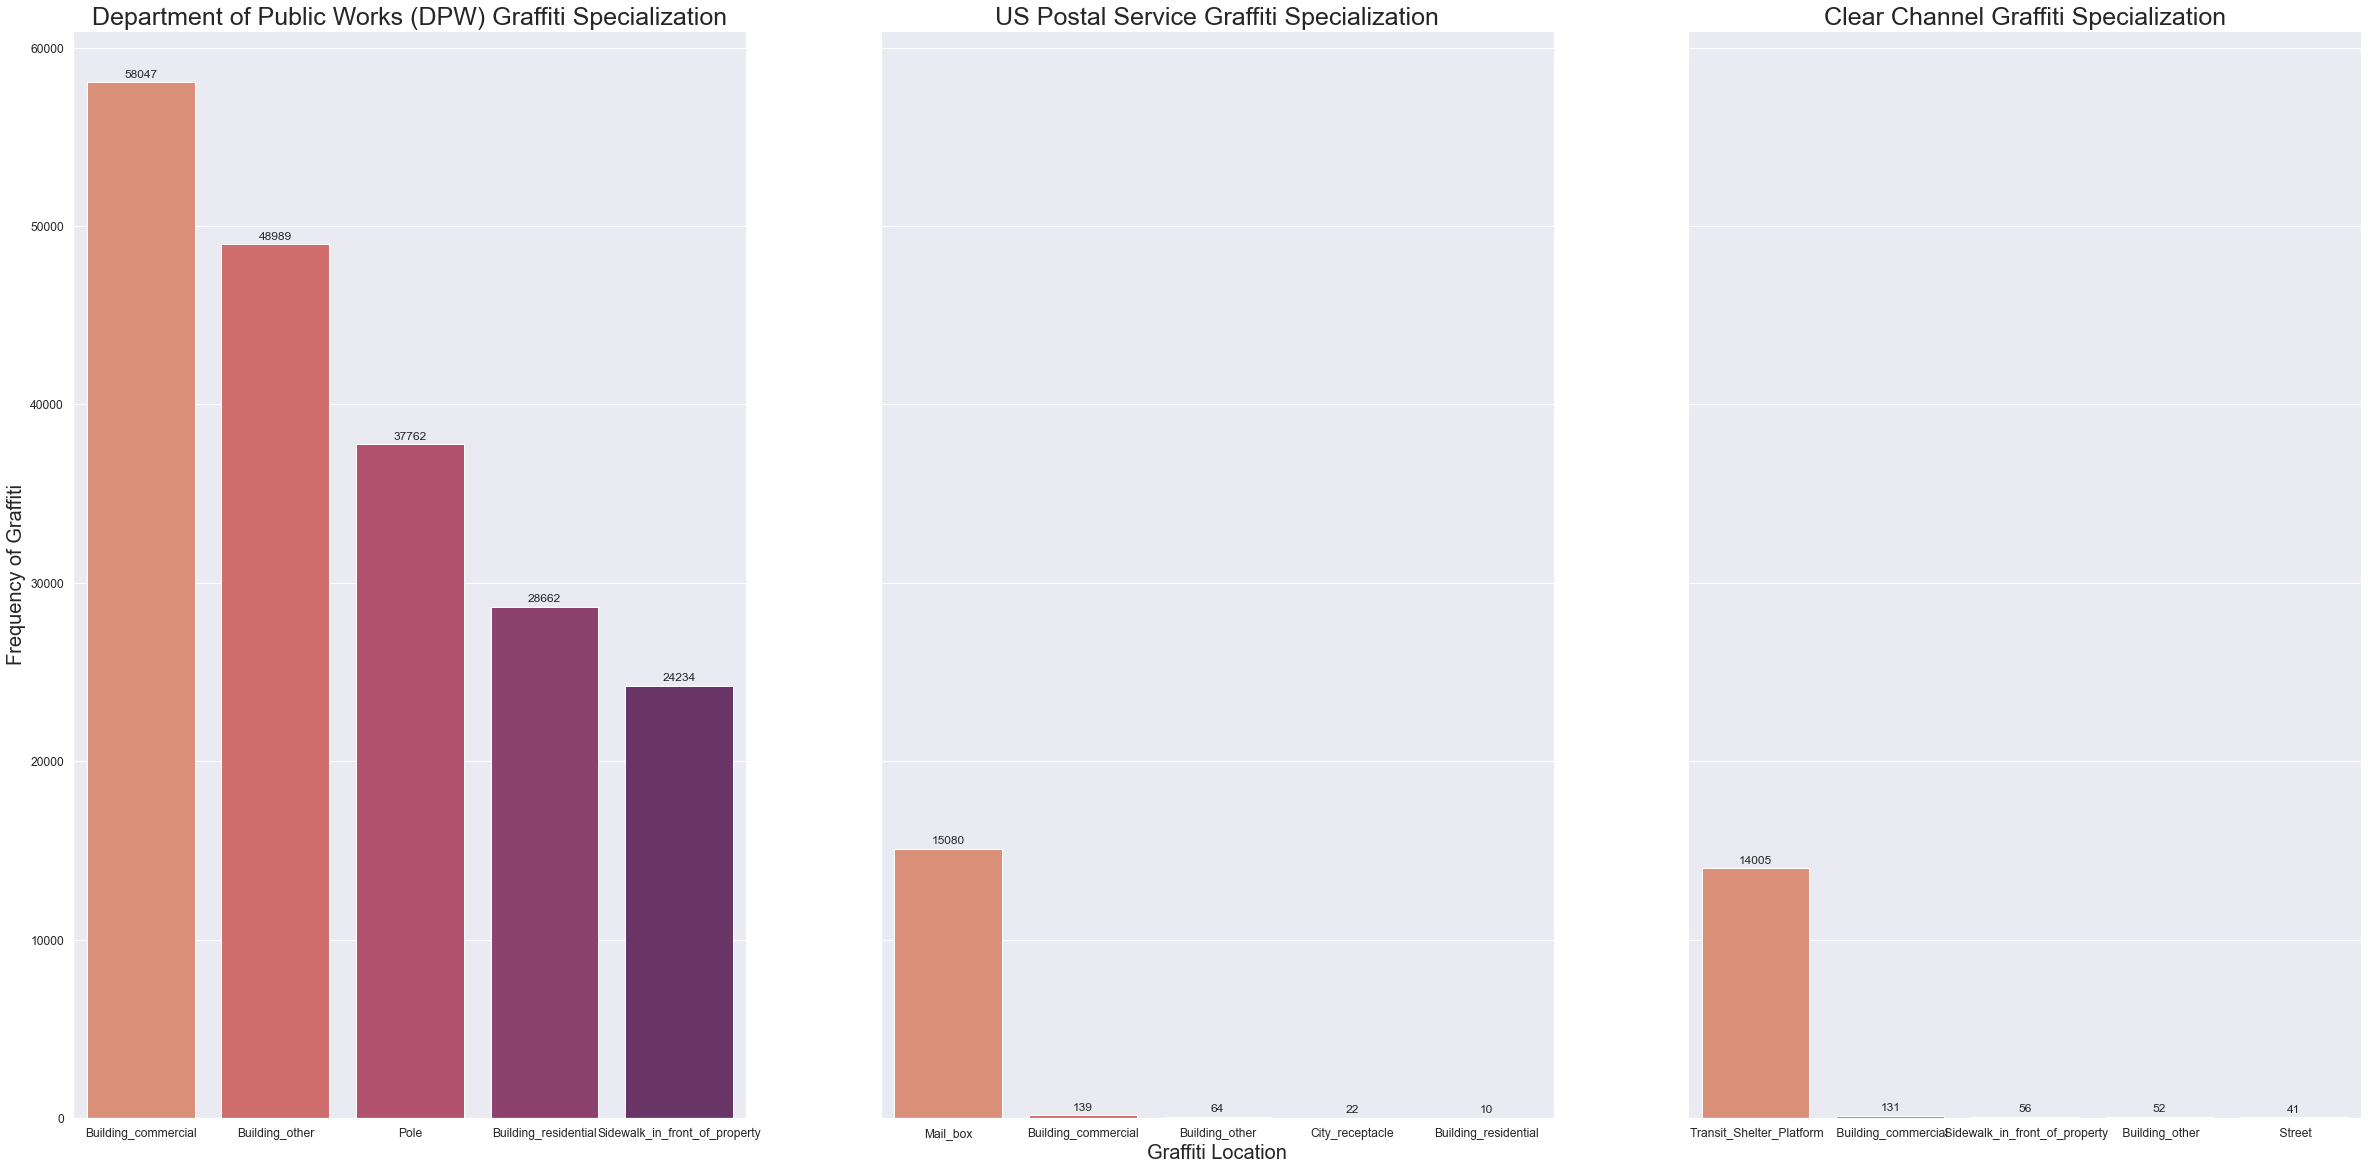

In [28]:
#creating the figure with axes
fig, axs = plt.subplots(1, 3, figsize=(41, 20), sharey = True)
sns.set(style='darkgrid')
ax1 = sns.barplot(x = get_types(dpw_ops).index.str[12:], y = get_types(dpw_ops), alpha = 1, palette = "flare", ax = axs[0])
ax2 = sns.barplot(x = get_types(usps).index.str[12:], y = get_types(usps), alpha = 1, palette = "flare", ax=axs[1])
ax3 = sns.barplot(x = get_types(clear_channel).index.str[11:], y = get_types(clear_channel), alpha = 1, palette = "flare", ax = axs[2])

#labeling the figure and axes with important information
ax1.set_ylabel("Frequency of Graffiti", fontsize = 20)
ax2.set_ylabel("")
ax3.set_ylabel("")
ax2.set_xlabel("Graffiti Location", fontsize = 20)
ax1.set_title("Department of Public Works (DPW) Graffiti Specialization", fontsize = 25)
ax2.set_title("US Postal Service Graffiti Specialization", fontsize = 25)
ax3.set_title("Clear Channel Graffiti Specialization", fontsize = 25)

#loop for labels on top of bars
for i in ax1.containers:
    ax1.bar_label(i, padding = 3)
    
for i in ax2.containers:
    ax2.bar_label(i, padding = 3)
    
for i in ax3.containers:
    ax3.bar_label(i, padding = 3)

pass

## Is there a certain kind of graffiti localized to a certain zipcode?

In [29]:
# 3 dataframes filtered to only have the rows asscoiated with one zipcode per dataframe
zip94110 = graf_clean[(graf_clean['zip_code'] == '94110') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')]
zip94117 = graf_clean[(graf_clean['zip_code'] == '94117') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')] 
zip94103 = graf_clean[(graf_clean['zip_code'] == '94103') & (graf_clean['Request Type'] != 'Graffiti on Other_enter_additional_details_below') & (graf_clean['Request Type'] != 'Graffiti')]

def get_graf_types(df):
    '''Returns the top 5 types of graffiti found within the zipcode dataframe'''
    return df['Request Type'].value_counts()[:5]

#calling the function on the filtered dataframes
get_graf_types(zip94110)
get_graf_types(zip94117)
get_graf_types(zip94103)


Graffiti on Building_commercial              10829
Graffiti on Building_other                    7322
Graffiti on Building_residential              2535
Graffiti on Sidewalk_in_front_of_property     2527
Graffiti on Signal_box                        2331
Name: Request Type, dtype: int64

In [30]:
#creating dataframe for grouped bar chart
graf_by_zip = pd.DataFrame({'Zipcode':['94110', '94110', '94110', '94110',
                                       '94117', '94117', '94117', '94117',
                                       '94103', '94103', '94103', '94103'],
                            'Graffiti Amount': [12114, 7005, 10028, 7863,
                                                3309, 3752, 3764, 3775,
                                                10829, 2535, 7322, 2527],
                            'Location': ['Building_Commercial', 'Building_Residential', 'Building_Other', 'Sidewalk',
                                         'Building_Commercial', 'Building_Residential', 'Building_Other', 'Sidewalk',
                                         'Building_Commercial', 'Building_Residential', 'Building_Other', 'Sidewalk']})

graf_by_zip

,Zipcode,Graffiti Amount,Location
0,94110,12114,Building_Commercial
1,94110,7005,Building_Residential
2,94110,10028,Building_Other
3,94110,7863,Sidewalk
4,94117,3309,Building_Commercial
5,94117,3752,Building_Residential
6,94117,3764,Building_Other
7,94117,3775,Sidewalk
8,94103,10829,Building_Commercial
9,94103,2535,Building_Residential


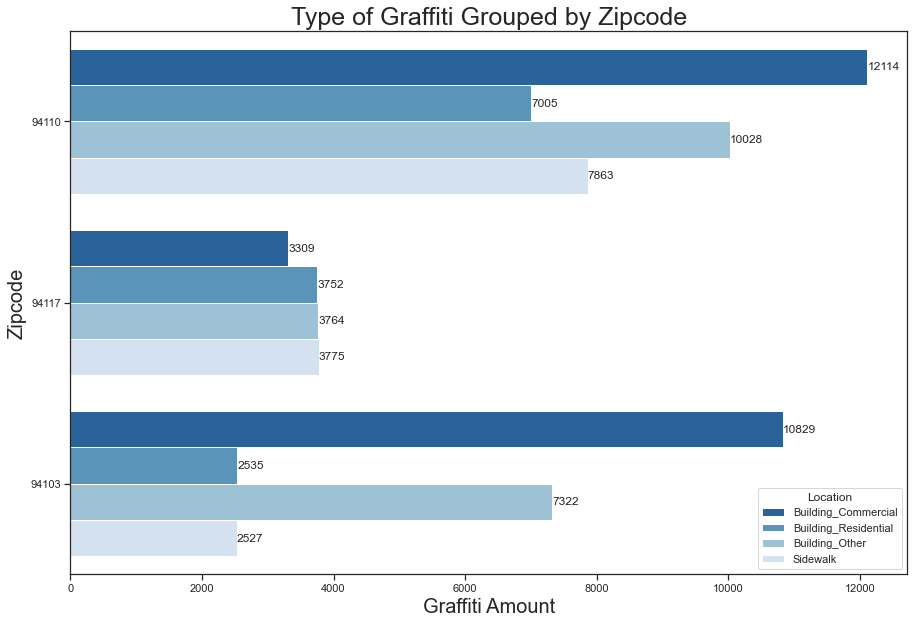

In [31]:
#creating grouped bar chart
plt.figure(figsize=(15,10))
sns.set(style='ticks')
ax = sns.barplot(x = 'Graffiti Amount', y = 'Zipcode', hue = 'Location', data = graf_by_zip, orient = 'h', palette = 'Blues_r')
plt.xlabel("Graffiti Amount", fontsize = 20)
plt.ylabel("Zipcode", fontsize = 20)
plt.title("Type of Graffiti Grouped by Zipcode", fontsize = 25)

#loop for displaying bar labels
for i in ax.containers:
    ax.bar_label(i,)
    
pass

## Which streets tend to contain the most reports of graffiti?

In [32]:
#separate by top 3 zip codes
street = graf_clean[graf_clean.zip_code.isin(['94110', '94103', '94117'])]

def get_street(series):
    '''get the street from the address'''
    comma_index = series.index(',') #least index of comma is the street
    space_index = series.index(' ') # first space to get rid of first address number
    street = series[space_index+1:comma_index]
    return street
#make the df street that has the street name
street = graf_clean
street['street'] = street.Address.apply(get_street)
street['date'] = street['DateTime'].dt.to_period('M') #add date that removes the time from the datetime object

street

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,DateTime,Closed_ind,time_to_close,zip_code,Year_Opened,Month_Opened,hours_to_close,days_to_close,street,date
9,698996,2010-07-23 11:10:43,2010-08-23 14:19:09,08/23/2010 02:19:09 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Offensive,...,2010-07-23 11:10:43,True,31 days 03:08:26,94118,2010,7,748.0,32.0,10TH AVE,2010-07
32,638695,2010-04-15 13:26:48,2010-04-22 09:16:28,04/22/2010 09:16:28 AM,Closed,Case Resolved,311 Service Request Queue - Hold,311 External Request,Graffiti,Graffiti - CalTrans,...,2010-04-15 13:26:48,True,6 days 19:49:40,94122,2010,4,164.0,7.0,19TH AVE,2010-04
37,623282,2010-03-20 15:32:57,2010-03-21 15:16:41,03/21/2010 03:16:41 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Pole,Pole - Not_Offensive,...,2010-03-20 15:32:57,True,0 days 23:43:44,94110,2010,3,24.0,1.0,18TH ST,2010-03
51,638506,2010-04-15 10:18:25,2010-04-15 17:16:53,04/15/2010 05:16:53 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Offensive,...,2010-04-15 10:18:25,True,0 days 06:58:28,94134,2010,4,7.0,1.0,SAN BRUNO AVE,2010-04
141,627872,2010-03-28 02:50:43,2010-05-28 15:16:53,05/28/2010 03:16:53 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Building_residential,Building_residential - Not_Offensive,...,2010-03-28 02:50:43,True,61 days 12:26:10,94121,2010,3,1477.0,62.0,42ND AVE,2010-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731679,3076935,2013-11-18 13:16:09,2013-12-02 12:56:46,12/02/2013 12:56:46 PM,Closed,Case Completed - resolved:,DPW Ops Queue,Graffiti,Graffiti on Building_other,Building_other - Not_Offensive,...,2013-11-18 13:16:09,True,13 days 23:40:37,94109,2013,11,336.0,14.0,VAN NESS AVE,2013-11
731680,3340904,2014-02-05 13:03:01,2014-03-20 12:16:02,03/20/2014 12:16:02 PM,Closed,Case Completed - resolved:,DPW Ops Queue,Graffiti,Graffiti on Building_other,Building_other - Not_Offensive,...,2014-02-05 13:03:01,True,42 days 23:13:01,94109,2014,2,1032.0,43.0,VAN NESS AVE,2014-02
731681,385526,2009-03-08 17:04:04,2009-03-09 15:10:10,03/09/2009 03:10:10 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,Graffiti on Pole,Pole - Not_Offensive,...,2009-03-08 17:04:04,True,0 days 22:06:06,94109,2009,3,23.0,1.0,VAN NESS AVE,2009-03
731682,4488970,2015-02-13 10:27:26,2015-03-06 11:17:31,03/06/2015 11:17:31 AM,Closed,Case Completed - resolved:,DPW Ops Queue,Graffiti,Graffiti on Building_other,Building_other - Not_Offensive,...,2015-02-13 10:27:26,True,21 days 00:50:05,94109,2015,2,505.0,22.0,VAN NESS AVE,2015-02


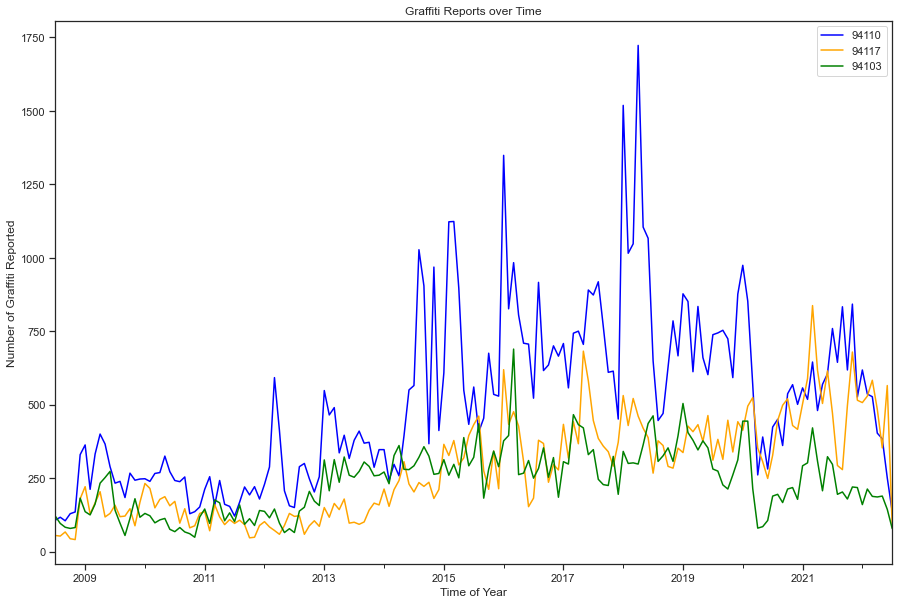

In [33]:
#add new data set by the top 3 zip codes using value counts
z94110 = street[street.zip_code == '94110']
z94110 = z94110['date'].value_counts().sort_index()

z94117 = street[street.zip_code == '94117']
z94117 = z94117['date'].value_counts().sort_index()

z94103 = street[street.zip_code == '94103']
z94103 = z94103['date'].value_counts().sort_index()

#Line plot of three zip codes over time
plt.figure(figsize = (15, 10))
z94110.plot(label = '94110', color = 'blue')
z94117.plot(label = '94117', color = 'orange')
z94103.plot(label = '94103', color = 'green')

plt.ylabel('Number of Graffiti Reported')
plt.xlabel('Time of Year')
plt.title('Graffiti Reports over Time')
plt.legend()
pass

In [34]:
#trying to filter requests that say its offensive
street['Request Details'].value_counts()
df1 = street[street['Request Details'].map(street['Request Details'].value_counts()) > 5]
df1 =  df1[df1['Request Details'].str.contains("Offensive", na = False)]
df1['Request Details'].value_counts()

Other_enter_additional_details_below - Offensive        51952
Building_other - Not_Offensive                          47814
Building_commercial - Not_Offensive                     43193
Pole - Not_Offensive                                    24522
Building_residential - Not_Offensive                    18760
Sidewalk_in_front_of_property - Not_Offensive           17077
Building_commercial - Offensive                         15280
Pole - Offensive                                        14459
Signal_box - Not_Offensive                              14238
Parking_meter - Not_Offensive                           12505
Mail_box - Not_Offensive                                10785
Transit_Shelter_Platform - Not_Offensive                10627
Sidewalk_in_front_of_property - Offensive                8996
Building_residential - Offensive                         8270
Mail_box - Offensive                                     6551
Signal_box - Offensive                                   6470
City_rec

In [35]:
#observe if the graffiti is offensive or not and add a column that deems it off/non-off
def offensive(series):
    if 'Not_Offensive' in series:
        return 'Not Offensive'
    else:
        return 'Offensive'
df1['grade'] = df1['Request Details'].apply(offensive)

In [36]:
#Filter top 12, group by street and off grade.
off = df1.groupby(['street', 'grade'])
off = pd.DataFrame(off.Opened.count().unstack().fillna(0))

#create offensive ratio
off['Offensive_Ratio'] = off['Offensive'] / (off['Not Offensive'] + off['Offensive'])
off['Total'] = off['Offensive'] + off['Not Offensive']
off = off.sort_values(by = 'Offensive', ascending = False)
off_top8 = off.head(12)
off.head(12)

grade,Not Offensive,Offensive,Offensive_Ratio,Total
street,,,,
MISSION ST,26472.0,5045.0,0.160072,31517.0
HAIGHT ST,5161.0,4720.0,0.477684,9881.0
MARKET ST,7483.0,3296.0,0.305780,10779.0
GEARY BLVD,4716.0,2916.0,0.382075,7632.0
DIVISADERO ST,2725.0,2602.0,0.488455,5327.0
24TH ST,3838.0,2474.0,0.391952,6312.0
POTRERO AVE,1745.0,2251.0,0.563313,3996.0
FULTON ST,1207.0,2117.0,0.636883,3324.0
HAYES ST,1591.0,2109.0,0.570000,3700.0


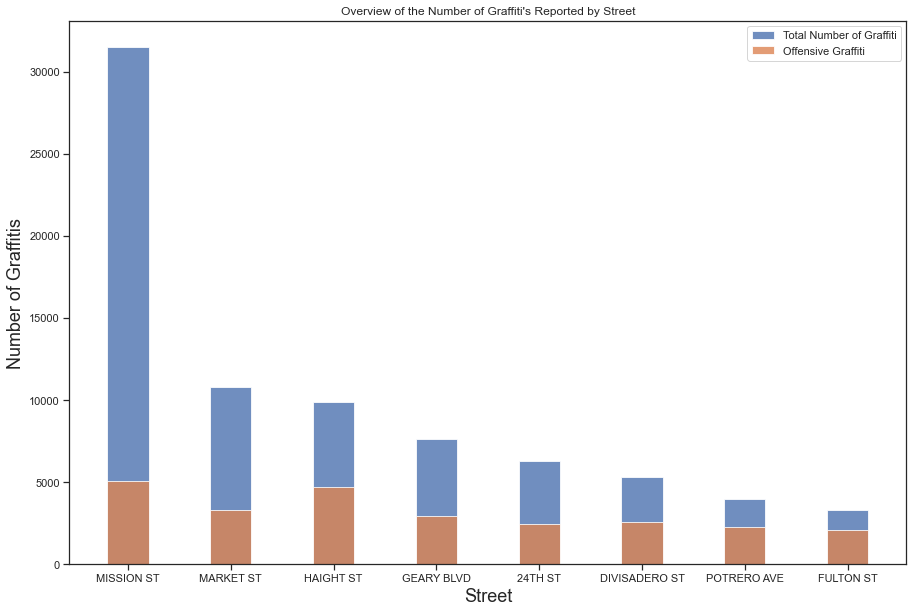

In [37]:
#bar plot of number of graffiti and number of offensive graffiti
plt.figure(figsize = (15,10))
off_top8 = off.head(8)
off_top8 = off_top8.sort_values(by = 'Total', ascending = False)
X_axis = np.arange(len(off_top8.index))
plt.bar(x = X_axis, width = .4, height= off_top8['Total'], alpha=0.8, label = 'Total Number of Graffiti')
plt.bar(x = X_axis, width = .4, height = off_top8['Offensive'], alpha=0.8, label = 'Offensive Graffiti')
plt.xticks(X_axis, off_top8.index)
plt.title("Overview of the Number of Graffiti's Reported by Street")
plt.xlabel('Street', fontsize=18)
plt.ylabel('Number of Graffitis', fontsize=18)
#plt.yscale('log')
plt.legend(loc = 'upper right')
pass

In [38]:
#group crime by neighborhood
crime_district = pd.DataFrame(police['Analysis Neighborhood'].value_counts())
crime_district.index.name = 'Neighbor'
crime_district.columns = ['num_crimes']
crime_district = crime_district.reset_index()
crime_district.head()

,Neighbor,num_crimes
0,Mission,62578
1,Tenderloin,58963
2,Financial District/South Beach,48315
3,South of Market,46969
4,Bayview Hunters Point,37753


In [39]:
#group graffiti by neighborhood
graf2018 = graf_clean[graf_clean['DateTime'] > '2017-12-31']
graf_district = pd.DataFrame(graf2018.Neighborhood.value_counts())
graf_district.index.name = 'Neighbor'
graf_district.columns = ['num_graf']
graf_district = graf_district.reset_index()
graf_district.head()

,Neighbor,num_graf
0,Mission,27990
1,South of Market,10915
2,Mission Dolores,7445
3,Outer Sunset,7242
4,Potrero Hill,7023


In [40]:
#another application of offensive
df2 =  graf2018[graf2018['Request Details'].str.contains("Offensive", na = False)]
df2['grade'] = df2['Request Details'].apply(offensive)
df2.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Closed_ind,time_to_close,zip_code,Year_Opened,Month_Opened,hours_to_close,days_to_close,street,date,grade
316,15410292,2022-06-04 08:21:39,2022-07-04 23:00:22,07/04/2022 11:00:22 PM,Closed,Transferred - Your request falls under the res...,US Postal Service Maintenance Queue,Graffiti,Graffiti on Mail_box,Mail_box - Not_Offensive,...,True,30 days 14:38:43,94110,2022,6,735.0,31.0,18TH ST,2022-06,Not Offensive
371,15435638,2022-06-09 17:19:00,2022-07-11 13:30:50,07/11/2022 01:30:50 PM,Closed,Administrative Closure - Per process - cases a...,AT and T - Graffiti Queue,Graffiti,Graffiti on ATT_Property,ATT_Property - Not_Offensive,...,True,31 days 20:11:50,94122,2022,6,765.0,32.0,23RD AVE,2022-06,Not Offensive
482,15493034,2022-06-24 10:11:00,2022-07-04 22:00:17,07/04/2022 10:00:17 PM,Closed,Case Resolved - Closed: No response from BSM i...,DPW BSM Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,...,True,10 days 11:49:17,94110,2022,6,252.0,11.0,VALENCIA ST,2022-06,Not Offensive
673,15509393,2022-06-28 12:27:00,2022-07-06 09:50:00,07/06/2022 09:50:00 AM,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Not_Offensive,...,True,7 days 21:23:00,94117,2022,6,190.0,8.0,HAYES ST,2022-06,Not Offensive
2242,15529879,2022-07-04 10:34:00,2022-07-04 11:58:41,07/04/2022 11:58:41 AM,Closed,Removed - Case Resolved,Fishermans Wharf CBD Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Offensive,...,True,0 days 01:24:41,94133,2022,7,2.0,1.0,COLUMBUS AVE,2022-07,Offensive


In [41]:
#separate data set that has the offensive ratio but grouped by neighborhood
off2 = df2.groupby(['Neighborhood', 'grade'])
off2 = pd.DataFrame(off2.Opened.count().unstack().fillna(0))
off2['Offensive_Ratio'] = off2['Offensive'] / (off2['Not Offensive'] + off2['Offensive'])
off2['Total'] = off2['Offensive'] + off2['Not Offensive']
off2 = off2.reset_index()
off2 = off2.sort_values('Total', ascending = False)
off2.columns = ['Neighbor', 'NotOffensive', 'Offensive', 'Offensive_Ratio', 'num_graf']
off2.head()

,Neighbor,NotOffensive,Offensive,Offensive_Ratio,num_graf
64,Mission,19105.0,8609.0,0.310637,27714.0
98,South of Market,8086.0,2791.0,0.256596,10877.0
77,Outer Sunset,2779.0,4428.0,0.614403,7207.0
66,Mission Dolores,4669.0,2459.0,0.344978,7128.0
44,Inner Richmond,1969.0,3529.0,0.641870,5498.0


In [42]:
#merge both data sets by neighborhood
graf_crime = crime_district.merge(off2, how  = 'inner', on = 'Neighbor')
graf_crime.head()

,Neighbor,num_crimes,NotOffensive,Offensive,Offensive_Ratio,num_graf
0,Mission,62578,19105.0,8609.0,0.310637,27714.0
1,Tenderloin,58963,2874.0,991.0,0.256404,3865.0
2,South of Market,46969,8086.0,2791.0,0.256596,10877.0
3,North Beach,19033,1022.0,636.0,0.383595,1658.0
4,Western Addition,18714,1276.0,2052.0,0.616587,3328.0


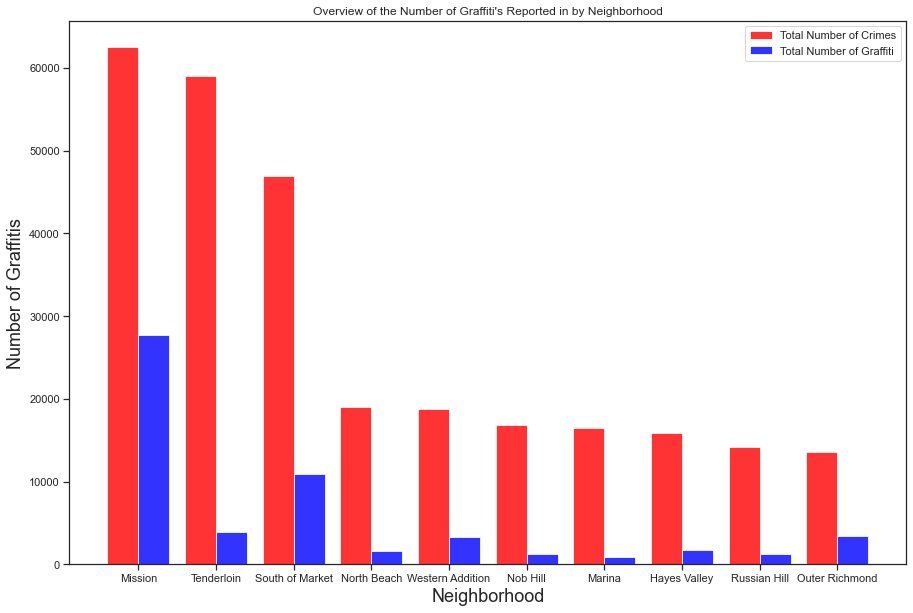

In [43]:
#bar plot of number of crimes and graf
#sort by number of crimes

plt.figure(figsize = (15,10))
crim_graf10 = graf_crime.head(10)
crim_graf10 = crim_graf10.sort_values(by = 'num_crimes', ascending = False)
X_axis = np.arange(len(crim_graf10.Neighbor))
plt.bar(x = X_axis -.2, width = .4, height= crim_graf10.num_crimes, color = 'red', alpha=0.8, label = 'Total Number of Crimes')
plt.bar(x = X_axis + .2, width = .4, height = crim_graf10.num_graf, alpha=0.8, color = 'blue', label = 'Total Number of Graffiti')

plt.xticks(X_axis, crim_graf10.Neighbor)
plt.title("Overview of the Number of Graffiti's Reported in by Neighborhood")
plt.xlabel('Neighborhood', fontsize=18)
plt.ylabel('Number of Graffitis', fontsize=18)
#plt.yscale('log')
plt.legend(loc = 'upper right')
pass

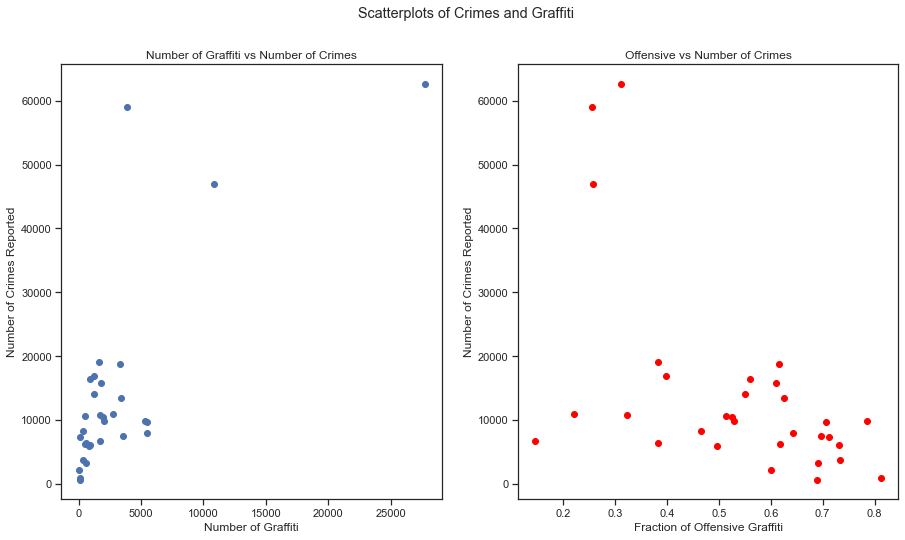

In [44]:
#plot to compare side by side off vs crime
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8))
fig.suptitle('Scatterplots of Crimes and Graffiti')



ax1.scatter(x = graf_crime.num_graf, y = graf_crime.num_crimes)
ax1.set_xlabel('Number of Graffiti')
ax1.set_ylabel('Number of Crimes Reported')
ax1.set_title('Number of Graffiti vs Number of Crimes')

ax2.scatter(x = graf_crime['Offensive_Ratio'], y = graf_crime.num_crimes, color = 'red')
ax2.set_xlabel('Fraction of Offensive Graffiti')
ax2.set_ylabel('Number of Crimes Reported')
ax2.set_title('Offensive vs Number of Crimes')
pass